In [1]:
import cv2
import mediapipe as mp

mp_hands = mp.solutions.hands
hands = mp_hands.Hands(
    static_image_mode=False,
    model_complexity=1,
    min_detection_confidence=0.75,
    min_tracking_confidence=0.75,
    max_num_hands=2
)

cap = cv2.VideoCapture(0)

while True:
    success, img = cap.read()
    if not success:
        print("Failed to grab frame")
        break

    # mirror image for webcam-like view
    img = cv2.flip(img, 1)

    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = hands.process(imgRGB)

    if results.multi_hand_landmarks:
        # if two hands detected, show 'Both Hands'
        if len(results.multi_handedness) == 2:
            cv2.putText(img, 'Both Hands', (250, 50),
                        cv2.FONT_HERSHEY_COMPLEX, 0.9, (0, 255, 0), 2)
        # otherwise iterate and get label for each detected hand
        # note: the order of multi_hand_landmarks and multi_handedness is linked,
        # so use the same index for both lists.
        for idx, hand_landmarks in enumerate(results.multi_hand_landmarks):
            # get handedness label directly from the proto object
            # classification is a repeated field; [0] holds the top label
            handedness_proto = results.multi_handedness[idx]
            label = handedness_proto.classification[0].label  # 'Left' or 'Right'

            # choose x position based on label (or use bounding box center if you prefer)
            if label == 'Left':
                x_pos = 20
            else:
                x_pos = img.shape[1] - 140  # near right edge

            cv2.putText(img, f'{label} Hand', (x_pos, 50),
                        cv2.FONT_HERSHEY_COMPLEX, 0.9, (0, 255, 0), 2)

            # Optionally draw the landmarks
            mp.solutions.drawing_utils.draw_landmarks(
                img, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    cv2.imshow('Image', img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


C:\Users\acer\AppData\Roaming\Python\Python310\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [2]:
!pip install pandas matplotlib mediapipe opencv-python

Access is denied.


Detected 1 hand. Landmark table (normalized coords and pixel coords):



C:\Users\acer\AppData\Roaming\Python\Python310\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


,name,x_norm,y_norm,z_norm,x_px,y_px
index,,,,,,
0,WRIST,0.379371,0.842994,7.511938e-07,243,405
1,THUMB_CMC,0.316221,0.812404,-2.746012e-02,202,390
2,THUMB_MCP,0.271812,0.726489,-4.094178e-02,174,349
3,THUMB_IP,0.236744,0.665453,-5.119765e-02,152,319
4,THUMB_TIP,0.193891,0.640184,-6.299943e-02,124,307
5,INDEX_MCP,0.332421,0.602605,-3.763311e-02,213,289
6,INDEX_PIP,0.313346,0.496428,-6.027998e-02,201,238
7,INDEX_DIP,0.303748,0.424651,-7.831387e-02,194,204
8,INDEX_TIP,0.297335,0.366957,-9.227896e-02,190,176



Num landmarks: 21 (should be 21).  Shape: (21, 3)


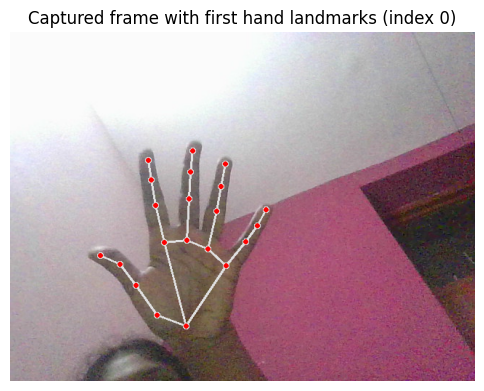

In [2]:
# Paste this entire block into a Jupyter cell and run it.
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Setup ---
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

hands = mp_hands.Hands(
    static_image_mode=False,
    model_complexity=1,
    min_detection_confidence=0.75,
    min_tracking_confidence=0.75,
    max_num_hands=2
)

# Friendly mapping of landmark index -> anatomical name
LANDMARK_NAMES = {
    0: "WRIST",
    1: "THUMB_CMC",
    2: "THUMB_MCP",
    3: "THUMB_IP",
    4: "THUMB_TIP",
    5: "INDEX_MCP",
    6: "INDEX_PIP",
    7: "INDEX_DIP",
    8: "INDEX_TIP",
    9: "MIDDLE_MCP",
    10: "MIDDLE_PIP",
    11: "MIDDLE_DIP",
    12: "MIDDLE_TIP",
    13: "RING_MCP",
    14: "RING_PIP",
    15: "RING_DIP",
    16: "RING_TIP",
    17: "PINKY_MCP",
    18: "PINKY_PIP",
    19: "PINKY_DIP",
    20: "PINKY_TIP",
}

# --- Capture one frame from webcam ---
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
cap.release()

if not ret:
    raise RuntimeError("Unable to read from the webcam (device 0). Make sure the camera is connected.")

# Mirror image for a webcam-like view
frame = cv2.flip(frame, 1)
img_h, img_w = frame.shape[:2]

# Convert to RGB for MediaPipe
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# --- Process with MediaPipe Hands ---
results = hands.process(frame_rgb)

if results.multi_hand_landmarks and len(results.multi_hand_landmarks) > 0:
    # We'll take the first detected hand (index 0)
    hand_landmarks = results.multi_hand_landmarks[0]

    # Build a table of landmark values
    rows = []
    for idx, lm in enumerate(hand_landmarks.landmark):
        x_norm = lm.x
        y_norm = lm.y
        z_norm = lm.z
        x_px = int(round(x_norm * img_w))
        y_px = int(round(y_norm * img_h))
        rows.append({
            "index": idx,
            "name": LANDMARK_NAMES.get(idx, f"LM_{idx}"),
            "x_norm": float(x_norm),
            "y_norm": float(y_norm),
            "z_norm": float(z_norm),
            "x_px": int(x_px),
            "y_px": int(y_px)
        })

    df = pd.DataFrame(rows)
    df = df.set_index("index")
    # Print summary information
    print("Detected 1 hand. Landmark table (normalized coords and pixel coords):\n")
    display(df)   # shows a nice table in Jupyter

    # Also print small summary / shapes
    coords_np = np.array([[r["x_norm"], r["y_norm"], r["z_norm"]] for r in rows])
    print(f"\nNum landmarks: {coords_np.shape[0]} (should be 21).  Shape: {coords_np.shape}")

    # Draw landmarks on the image for visualization
    annotated = frame.copy()
    mp_drawing.draw_landmarks(annotated, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    # Show the annotated image inline
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Captured frame with first hand landmarks (index 0)")
    plt.show()

else:
    print("No hand detected in the captured frame. Try moving your hand in front of the webcam and re-run the cell.")

# Clean up MediaPipe resources
hands.close()


In [4]:
# --- Auto-install required libraries (run only if missing) ---
try:
    import mediapipe as mp
    import cv2
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
except ModuleNotFoundError:
    !pip install mediapipe opencv-python pandas matplotlib
    import mediapipe as mp
    import cv2
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt

# --- Setup ---
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

hands = mp_hands.Hands(
    static_image_mode=False,
    model_complexity=1,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5,
    max_num_hands=2
)

# Landmark names for clarity
LANDMARK_NAMES = {
    0: "WRIST",
    1: "THUMB_CMC",
    2: "THUMB_MCP",
    3: "THUMB_IP",
    4: "THUMB_TIP",
    5: "INDEX_MCP",
    6: "INDEX_PIP",
    7: "INDEX_DIP",
    8: "INDEX_TIP",
    9: "MIDDLE_MCP",
    10: "MIDDLE_PIP",
    11: "MIDDLE_DIP",
    12: "MIDDLE_TIP",
    13: "RING_MCP",
    14: "RING_PIP",
    15: "RING_DIP",
    16: "RING_TIP",
    17: "PINKY_MCP",
    18: "PINKY_PIP",
    19: "PINKY_DIP",
    20: "PINKY_TIP",
}

# --- Capture one frame from webcam ---
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
cap.release()

if not ret:
    raise RuntimeError("Unable to read from the webcam (device 0). Check camera connection.")

# Mirror for a natural webcam view
frame = cv2.flip(frame, 1)
img_h, img_w = frame.shape[:2]

# Convert BGR → RGB (MediaPipe expects RGB)
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# --- Run MediaPipe Hands ---
results = hands.process(frame_rgb)

if results.multi_hand_landmarks and len(results.multi_hand_landmarks) > 0:
    # Take first detected hand
    hand_landmarks = results.multi_hand_landmarks[0]

    # Store landmarks in a table
    rows = []
    for idx, lm in enumerate(hand_landmarks.landmark):
        x_norm, y_norm, z_norm = lm.x, lm.y, lm.z
        x_px, y_px = int(x_norm * img_w), int(y_norm * img_h)
        rows.append({
            "index": idx,
            "name": LANDMARK_NAMES.get(idx, f"LM_{idx}"),
            "x_norm": x_norm,
            "y_norm": y_norm,
            "z_norm": z_norm,
            "x_px": x_px,
            "y_px": y_px
        })

    df = pd.DataFrame(rows).set_index("index")

    # ---- Calculate Thumb–Index Tip Distance ----
    thumb_tip = df.loc[4]   # THUMB_TIP
    index_tip = df.loc[8]   # INDEX_TIP

    # Normalized distance
    norm_dist = np.sqrt(
        (thumb_tip["x_norm"] - index_tip["x_norm"])**2 +
        (thumb_tip["y_norm"] - index_tip["y_norm"])**2 +
        (thumb_tip["z_norm"] - index_tip["z_norm"])**2
    )

    # Pixel distance (2D)
    pixel_dist = np.sqrt(
        (thumb_tip["x_px"] - index_tip["x_px"])**2 +
        (thumb_tip["y_px"] - index_tip["y_px"])**2
    )

    print("✅ Detected one hand.\n")
    print(f"📏 Distance between Thumb Tip (LM_4) and Index Tip (LM_8):")
    print(f"   → Normalized distance: {norm_dist:.4f}")
    print(f"   → Pixel distance: {pixel_dist:.2f} pixels\n")

    # Display landmark table
    display(df)

    # Draw landmarks on image
    annotated = frame.copy()
    mp_drawing.draw_landmarks(annotated, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    # Highlight Thumb Tip and Index Tip points
    cv2.circle(annotated, (thumb_tip["x_px"], thumb_tip["y_px"]), 8, (0, 0, 255), -1)
    cv2.circle(annotated, (index_tip["x_px"], index_tip["y_px"]), 8, (255, 0, 0), -1)
    cv2.line(annotated,
             (thumb_tip["x_px"], thumb_tip["y_px"]),
             (index_tip["x_px"], index_tip["y_px"]),
             (0, 255, 0), 2)

    # Show annotated image
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
    plt.title("Detected Hand with Thumb–Index Distance Line")
    plt.axis("off")
    plt.show()

else:
    print("⚠️ No hand detected. Try showing your hand clearly to the webcam and re-run the cell.")

# Clean up
hands.close()


⚠️ No hand detected. Try showing your hand clearly to the webcam and re-run the cell.
